# 과제 1. 베이스라인 코드에 주석 달기 (흐름 파악하기)

1주차 과제 1과 동일하게 진행하시면 됩니다.


편의를 위해 코드를 나누어 두었으며, 하나씩 실행시키며 진행하면서 오류나 결과를 확인해보세요 ~

In [14]:
# pandas - 데이터프레임 처리
import pandas as pd

# numpy - 수학 및 통계 연산
import numpy as np

# SimpleImputer - 결측치 처리
from sklearn.impute import SimpleImputer

#LabelEncoder, OneHotEncoder - 범주형 데이터를 수치형 데이터로 처리
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# RandomForestClassifier - 랜덤 포레스트 모델 불러오기
from sklearn.ensemble import RandomForestClassifier

In [15]:
# 학습 데이터를 데이터 프레임으로 저장
train = pd.read_csv('./train.csv')

train.head()

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,0
1,TRAIN_0001,현장확인,170500000.0,200000,NaN,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,0
2,TRAIN_0002,전화확인,114000000.0,380000,NaN,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,0
3,TRAIN_0003,현장확인,163500000.0,30000,36.3,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,0
4,TRAIN_0004,현장확인,346000000.0,530000,NaN,3.0,3.0,동향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-06-25,1


In [16]:
# 학습 데이터 정보 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      2452 non-null   object 
 1   매물확인방식  2452 non-null   object 
 2   보증금     2452 non-null   float64
 3   월세      2452 non-null   int64  
 4   전용면적    1665 non-null   float64
 5   해당층     2223 non-null   float64
 6   총층      2436 non-null   float64
 7   방향      2452 non-null   object 
 8   방수      2436 non-null   float64
 9   욕실수     2434 non-null   float64
 10  주차가능여부  2452 non-null   object 
 11  총주차대수   1756 non-null   float64
 12  관리비     2452 non-null   int64  
 13  중개사무소   2452 non-null   object 
 14  제공플랫폼   2452 non-null   object 
 15  게재일     2452 non-null   object 
 16  허위매물여부  2452 non-null   int64  
dtypes: float64(7), int64(3), object(7)
memory usage: 325.8+ KB


In [17]:
# 학습 데이터에서 ID와 허위매물여부를 제외한 나머지 칼럼만 남기기
x = train.drop(['ID','허위매물여부'],axis=1)

# 우리가 예측해야 할 허위매물여부를 y에 저장하기
y = train['허위매물여부']

In [18]:
#SimpleImputer를 사용해서 결측치가 존재할 때 평균값으로 대체할 예정
mean_imputer = SimpleImputer(strategy='mean')

# 평균값으로 결측치를 채우려고 하는 칼럼들은 columns_fill_mean에 저장
columns_fill_mean = ['해당층', '총층','전용면적','방수', '욕실수','총주차대수']

# 평균값으로 결측치를 채우기 (데이터 프레임에 적용!)
x[columns_fill_mean] = mean_imputer.fit_transform(x[columns_fill_mean])

In [19]:
# 라벨 인코딩을 적용할 변수들
label_encode_cols = ['중개사무소','게재일','제공플랫폼','방향']

# 나중에 변환된 값을 다시 원래 값으로 돌리거나 할 때 딕셔너리를 만들어 둠
# 각 컬럼에 적용한 라벨 인코더 객체를 저장하기 위한 딕셔너리
label_encoders = {}
for col in label_encode_cols:
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col].astype(str)) # 라벨 인코더는 문자열만 처리할 수 있어서 astype(str)으로 문자열로 바꿨음
    label_encoders[col] = le

In [20]:
# 원-핫 인코딩을 적용할 변수들
one_hot_cols = ['매물확인방식', '주차가능여부']

# spare_output=False로 설정하면 밀집 배열로 반환하는데, 아마도 적용할 변수가 많지 않아서 이거 사용해도 문제가 없는듯
# handle_unknown='ignore'로 설정하면 테스트 데이터에 없는 새로운 범주가 있을 때 에러를 발생시키지 않는다
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# 원-핫 인코딩 하기로 한거 수행
# fit_transform을 통해 학습과 변환을 동시에 하고 반환값은 넘파이 배열
x_encoded = one_hot_encoder.fit_transform(x[one_hot_cols])

# 넘파이에서 데이터 프레임으로 변환하고, 컬럼명은 one_hot_encoder.get_feature_names_out()으로 지정
# 인덱스는 x의 인덱스를 그대로 사용 (concat을 할 때 인덱스가 같아야 함)
x_encoded_df = pd.DataFrame(x_encoded, columns=one_hot_encoder.get_feature_names_out(one_hot_cols), index=x.index)

# 기존에 원-핫 인코딩 대상 컬럼은삭제하고 원-핫 인코딩 한거를 합친다.
x = pd.concat([x.drop(columns=one_hot_cols), x_encoded_df], axis=1)

In [21]:
# 랜덤 포레스트 모델 생성 및 하이퍼 파라미터 정의
model = RandomForestClassifier(n_estimators=100, # 트리 개수 10개
                               criterion='gini', # 트리 분할 기준으로 지니 불순도 사용 - 지니 불순도는 0에 가까울수록 순수하다라는 의미
                               max_depth=None, # 트리의 최대 깊이를 제한하지 않음 - 노드가 순수해질 때까지 분할 없음
                               random_state=42) # 항상 동일한 결과를 얻기 위해 시드 고정
model.fit(x, y)

RandomForestClassifier(random_state=42)

In [22]:
# 테스트 데이터 살펴보기
test = pd.read_csv('./test.csv')
test.head()

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일
0,TEST_000,서류확인,223000000.0,530000,NaN,5.0,5.0,남향,1.0,1.0,불가능,NaN,7,Z86Th6S3K5,D플랫폼,2024-10-21
1,TEST_001,서류확인,150500000.0,590000,30.26,7.0,11.0,서향,1.0,1.0,불가능,16.0,11,G52Iz8V2B9,D플랫폼,2023-09-02
2,TEST_002,현장확인,47000000.0,200000,41.50,2.0,3.0,남서향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-04-03
3,TEST_003,서류확인,133000000.0,250000,31.35,5.0,6.0,남향,2.0,1.0,가능,NaN,5,C41wx1K6U9,B플랫폼,2024-09-19
4,TEST_004,현장확인,108000000.0,380000,23.14,2.0,3.0,남향,1.0,1.0,불가능,NaN,0,Z68ZJ6F6L4,A플랫폼,2024-11-10


In [23]:
# 테스트 데이터 결측치 처리
# 학습 데이터에서 이미 학습된 평균값으로 결측치를 채워주는 SimpleImputer 객체를 사용
test[columns_fill_mean] = mean_imputer.transform(test[columns_fill_mean])

In [24]:
# 테스트 데이터에 대해 라벨 인코딩을 적용합
for col in label_encode_cols:
    if col in test.columns:
        le = label_encoders[col] # 학습 데이터에서 사용된 라벨 인코더를 가져와서
        test[col] = test[col].astype(str) # 텍스트 데이터의 해당 컬럼들을 문자열로 변환하고
        unseen = set(test[col].unique()) - set(le.classes_) # 학습 데이터에는 없고 테스트 데이터에만 있는 값이 있는지 찾아 봅니다
        if unseen: # 새로운 값이 있다면
            le.classes_ = np.append(le.classes_, list(unseen)) # 기존 클래스 리스트에 추가해주고 확장해줍시다
        test[col] = le.transform(test[col]) # 그리고 인코딩으로 마무리를 해줍니다

In [25]:
# 테스트 데이터에 대해 원-핫 인코딩을 적용
# 이미 학습 데이터에서 fit()이 완료된 원-핫 인코더만을 사용
test_encoded = one_hot_encoder.transform(test[one_hot_cols])

# 원-핫 인코딩 결과를 데이터 프레임으로 변환
# 인덱스는 test의 인덱스를 그대로 사용 (concat을 할 때 인덱스가 같아야 함)
# 컬럼명은 one_hot_encoder.get_feature_names_out()으로 지정
test_encoded_df = pd.DataFrame(test_encoded, columns=one_hot_encoder.get_feature_names_out(one_hot_cols), index=test.index)

# 기존에 원-핫 인코딩 대상 컬럼은 삭제하고 원-핫 인코딩한 것을 합칩시다
test = pd.concat([test.drop(columns=one_hot_cols), test_encoded_df], axis=1)

In [26]:
# 테스트 데이터에서 ID를 제외한 나머지 칼럼만 남기기
test.drop(columns=['ID'],inplace=True)

In [27]:
# 학습이 완료된 랜덤 포레스트 모델을 이용해서 테스트 데이터 예측 시작
# 예측 결과는 넘파이로 반환해요
pred = pd.Series(model.predict(test))

In [28]:
# 대회는 항상 제출해보시는 걸 추천드립니다!
submit = pd.read_csv('./sample_submission.csv')

submit['허위매물여부'] = pred
submit.head()

,ID,허위매물여부
0,TEST_000,0
1,TEST_001,0
2,TEST_002,1
3,TEST_003,0
4,TEST_004,0


# 과제 2 시각화하기

1주차에 했었던 과제와 동일하게 자유롭게 시각화해보세요.

* 이번에는 전처리를 위한 시각화라는 것을 인지하고 이상치나 데이터의 분포, 불균형 등이 있는지 확인하고 어떻게 처리하면 좋을지 생각하면서 시각화를 진행해보세요 !

In [48]:
import matplotlib.pyplot as plt
from matplotlib import rc
import platform

# 시스템별 폰트 지정
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')  # 윈도우일 경우
elif platform.system() == 'Darwin':  # MacOS
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='NanumGothic')  # 리눅스일 경우 추천

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

Target의 분포 확인

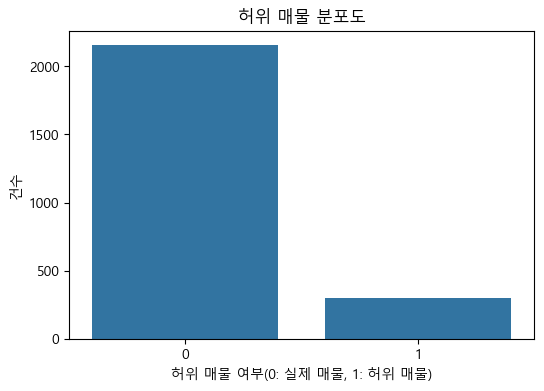

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# 타겟 분포 시각화 (허위매물여부)
plt.figure(figsize=(6, 4))
sns.countplot(x=train['허위매물여부'])
plt.title('허위 매물 분포도')
plt.xlabel('허위 매물 여부(0: 실제 매물, 1: 허위 매물)')
plt.ylabel('건수')
plt.show()

boxplots으로 이상치 알아보기

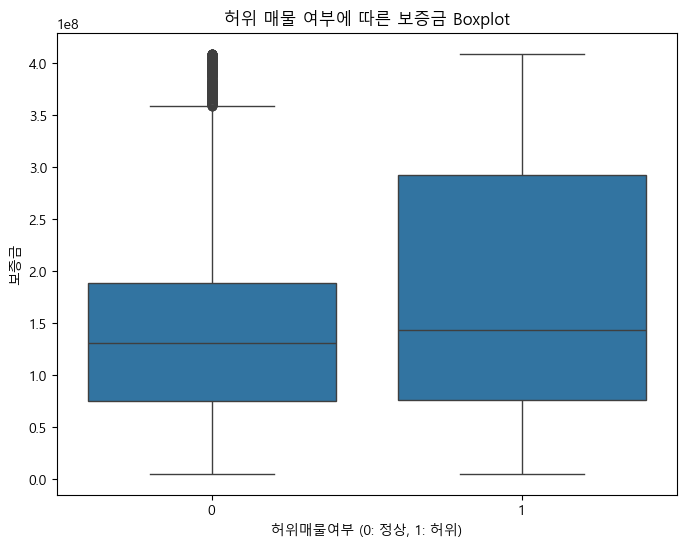

In [56]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='허위매물여부', y='보증금', data=train)
plt.title('허위 매물 여부에 따른 보증금 Boxplot')
plt.xlabel('허위매물여부 (0: 정상, 1: 허위)')
plt.ylabel('보증금')
plt.show()

# 허위 매물은 보증금의 분포가 꽤 넓은 편이다
# 근데 왜 정상 매물 쪽에 이상치가 왜이리 많은 거지?
# 현실적인 매물에 고가 매물도 있고 그럴 수도 있음
# 일단 허위 매물이 보증금 금액도 크고 더 고가 매물일 가능성이 있다고 봄

데이터의 분포 알아보기

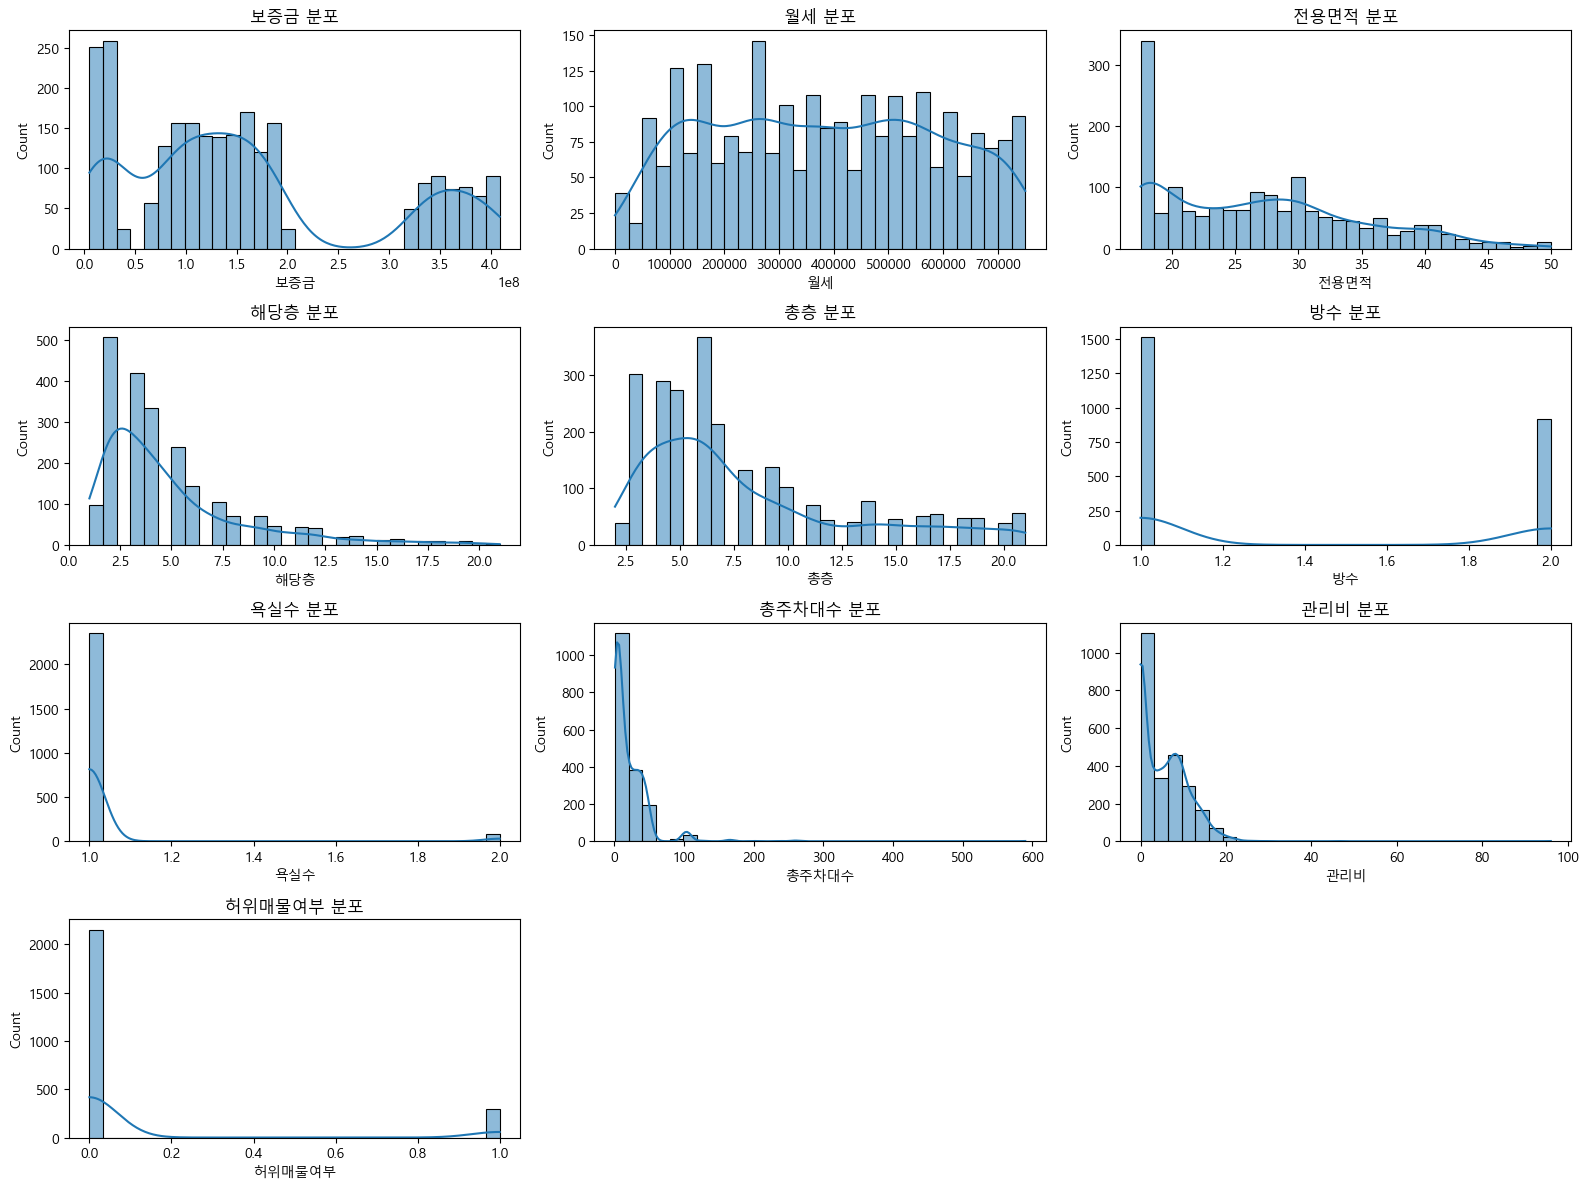

In [62]:
# 데이터 하나만 보기 좀 그래서 다 보기로 했습니다

import matplotlib.pyplot as plt
import seaborn as sns

# 수치형 변수만 추출
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 전체 수치형 변수 분포 시각화
plt.figure(figsize=(16, 12))

for idx, col in enumerate(numerical_cols):
    plt.subplot((len(numerical_cols) + 2) // 3, 3, idx + 1)
    sns.histplot(train[col].dropna(), kde=True, bins=30)
    plt.title(f'{col} 분포')

plt.tight_layout()
plt.show()

기타 시각화하고 싶은 내용을 자유롭게 진행하세요 ~

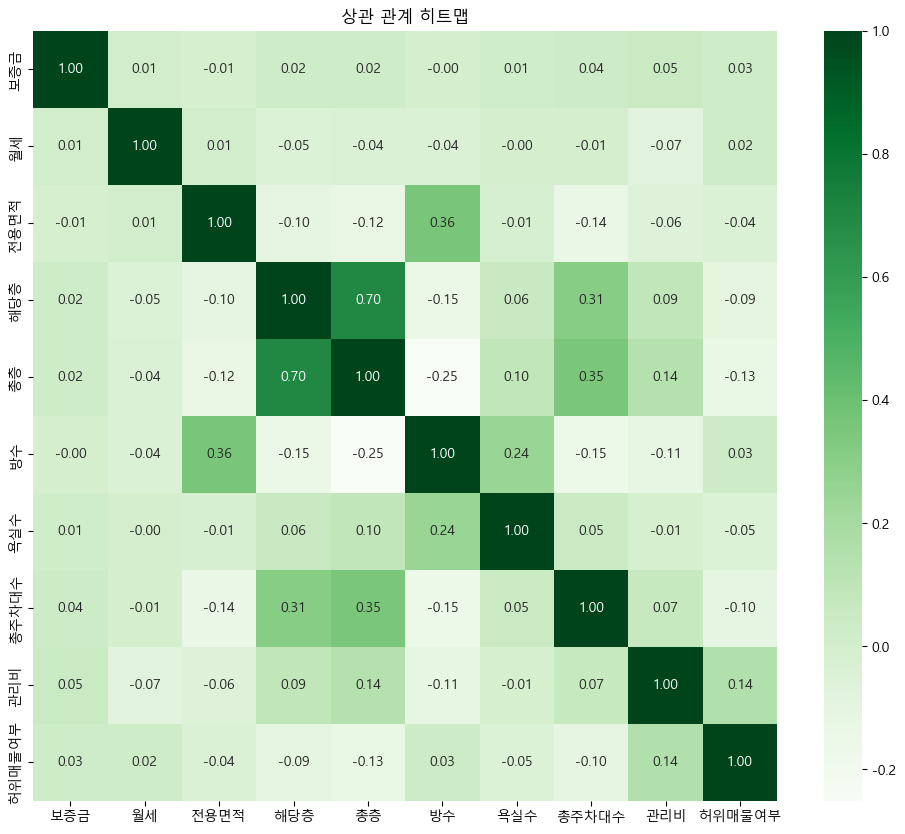

In [60]:
# 수치형 피처만 선택해서 봅시다
numeric_train = train.select_dtypes(include=['int64', 'float64'])

# 각 피처들 간의 연관성 파악을 위해 히트맵 그리기
plt.figure(figsize=(12, 10))
corr_matrix = numeric_train.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='Greens')
plt.title('상관 관계 히트맵')
plt.show()

# 변수 간 상관 관계
# 총층이 높을 수록 해당층도 높아진다 (당연)
# 면접이 넓을 수록 방이 많아진다 
# 총층이 높아질 수록 방 개수도 증가한다
# 방 개수가 많아지면 욕실도 많아진다

# 허위매물여부와 상관관계가 높은 피처들을 살펴보자
# 허위매물일 수록 관리비가 살짝 높은듯?
# 허위매물일 수록 총 주차대수가 적거나 없나봐요
# 허위매물일 수록 낮은 층 수에 위치
# 허위매물일 수록 방 수가 적은 경향이 있음
# 보증금, 월세, 전용 면적, 욕실 수와는 거의 관계가 없어 보인다

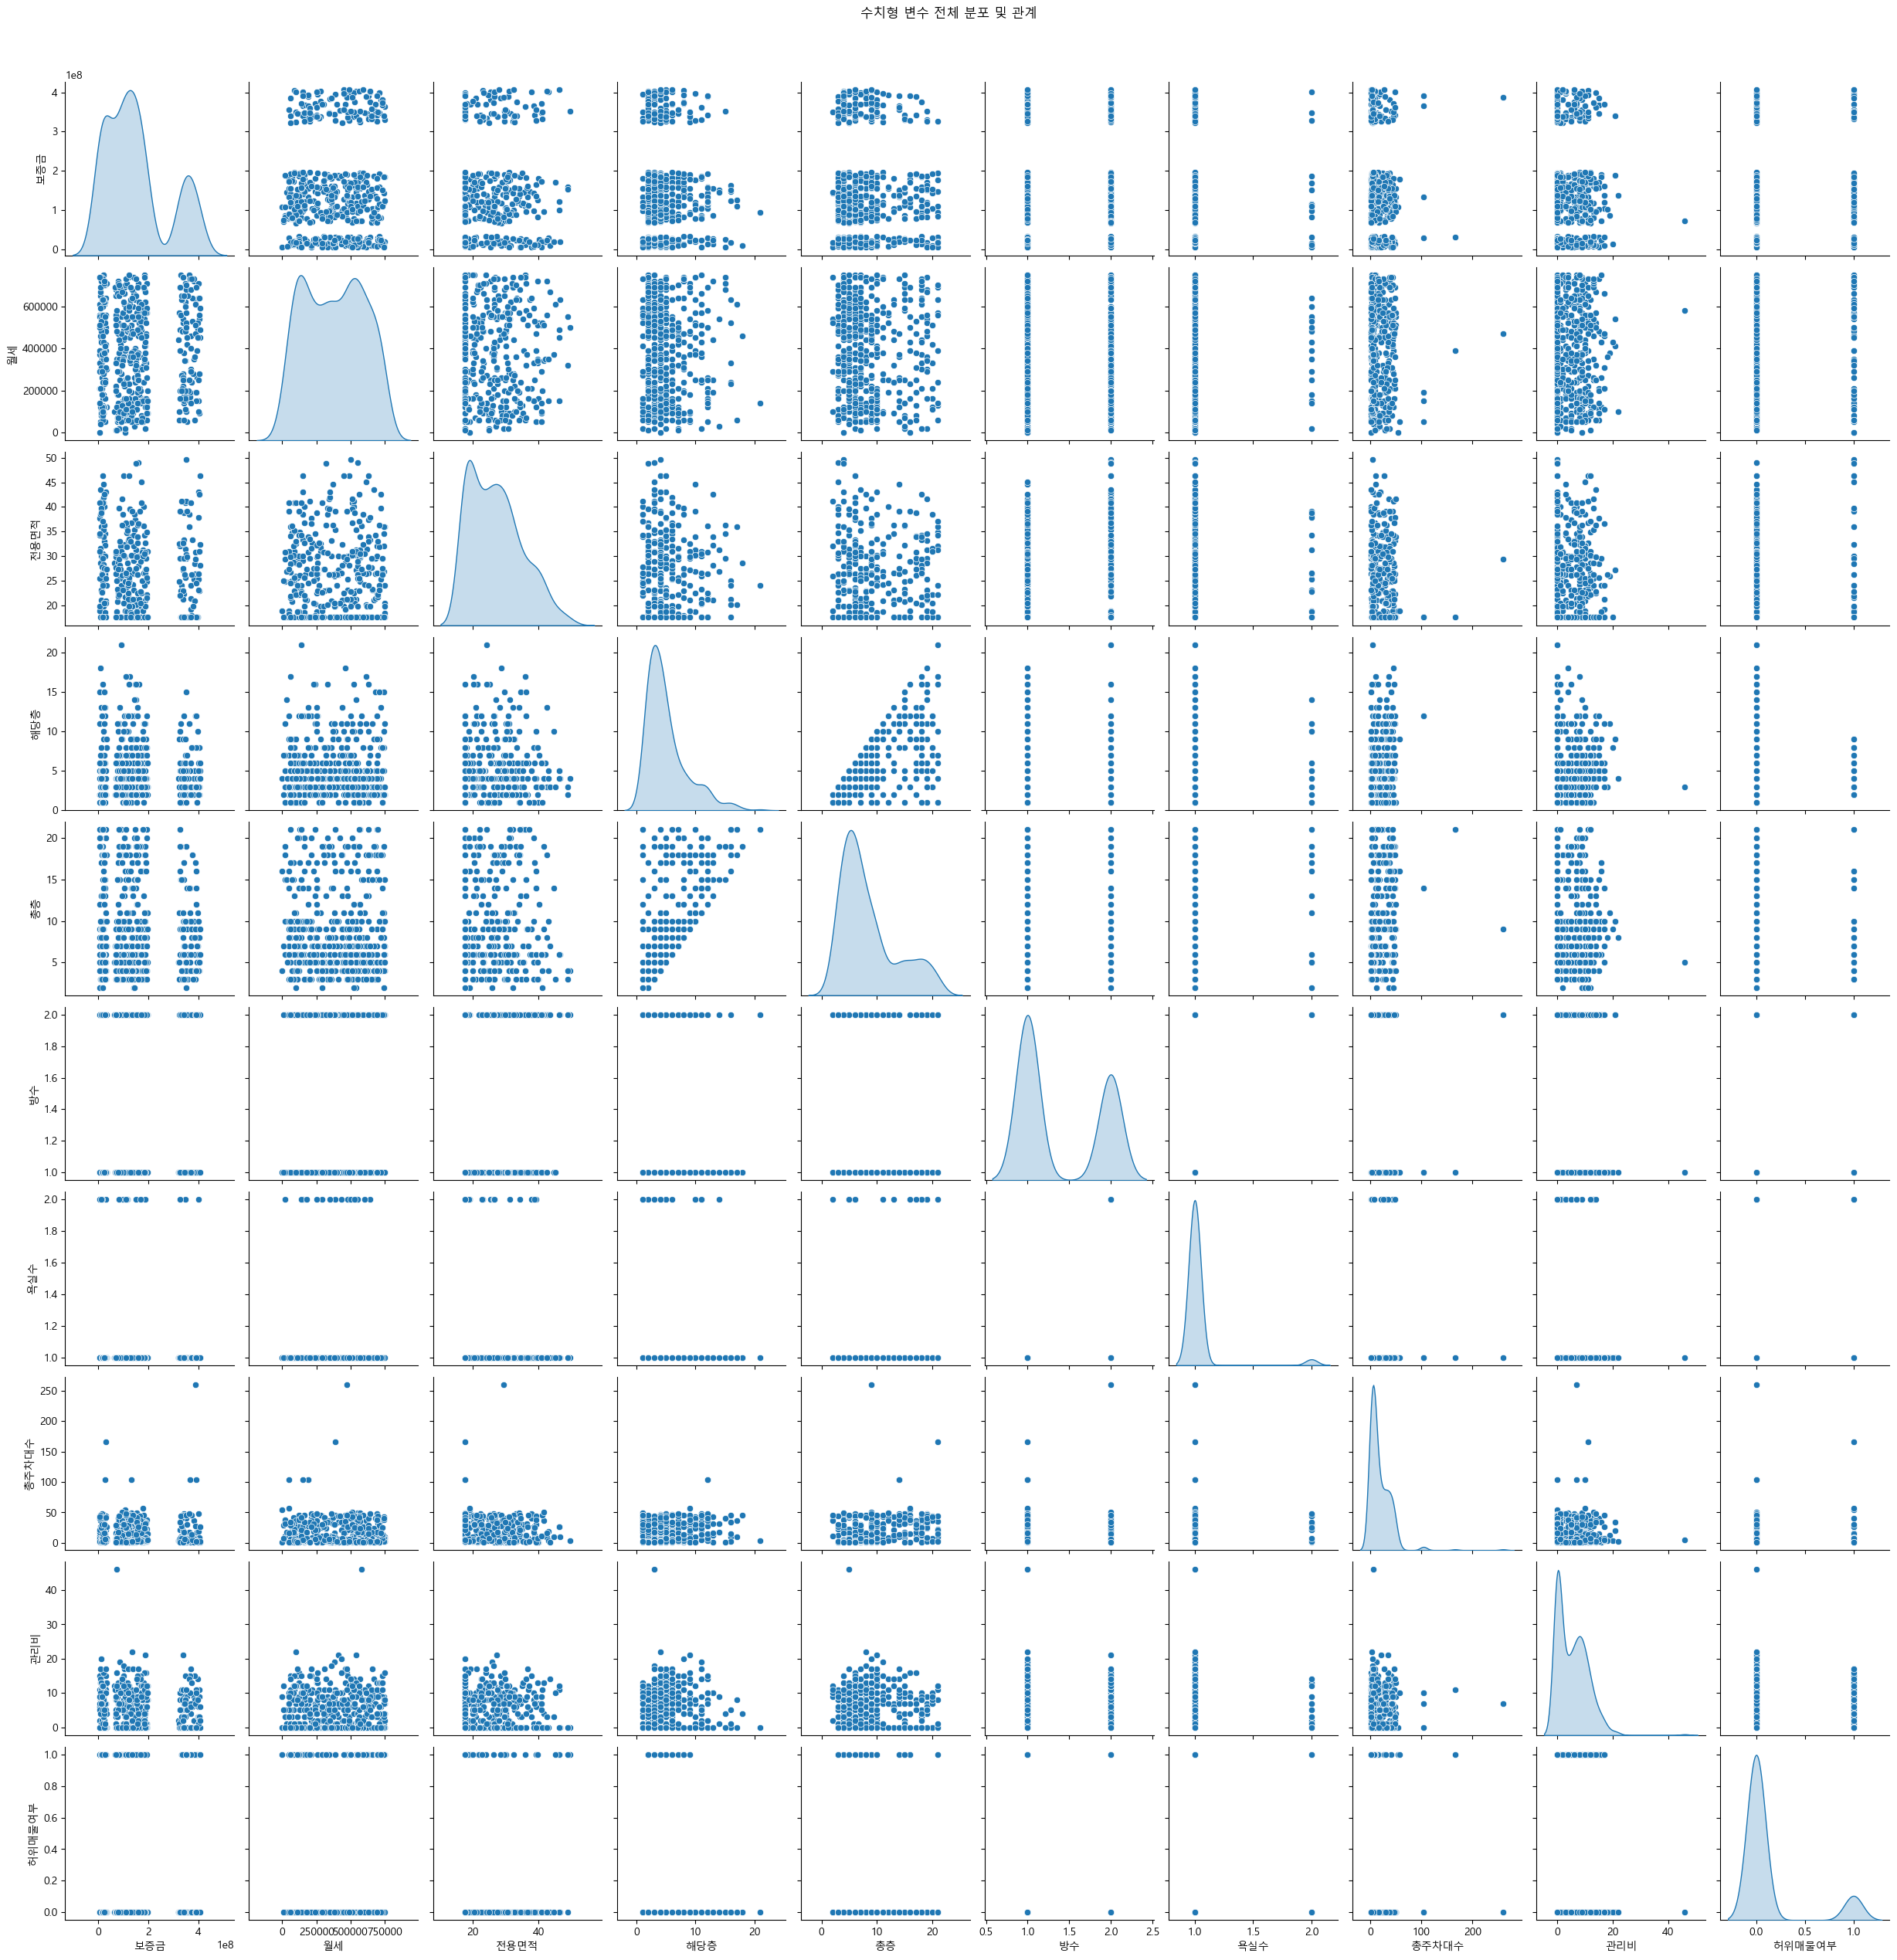

In [64]:
# Pairplot으로 변수 간 관계와 분포를 한 번에 보기

# 너무 많은 데이터면 샘플링해서 볼 수도 있음
sampled_train = train.sample(n=500, random_state=42)

# 수치형 변수만 사용해서 pairplot 시각화
sns.pairplot(sampled_train[numerical_cols], diag_kind='kde')
plt.suptitle('수치형 변수 전체 분포 및 관계', y=1.02)
plt.show()

# Pair Plot은 데이터 셋 내의 변수 쌍 간의 관계를 시각적으로 표현한 그래프이다

# 과제 3 결측치 처리하기

아래 코드를 실행시키고 결측치를 확인해보세요!

단순대체의 여러 방법을 진행하여 결측치를 처리하고 성능을 확인해보세요

**3-1 평균 대체**

In [65]:
# 원본을 복사해서 작업
train_mean_imputed = train.copy()

# 수치형 변수만 추출
numerical_cols = train_mean_imputed.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 평균값으로 결측치 대체
for col in numerical_cols:
    mean_val = train_mean_imputed[col].mean()
    train_mean_imputed[col].fillna(mean_val, inplace=True)

# 결측치가 잘 처리됐는지 확인
print(train_mean_imputed.isnull().sum())

ID        0
매물확인방식    0
보증금       0
월세        0
전용면적      0
해당층       0
총층        0
방향        0
방수        0
욕실수       0
주차가능여부    0
총주차대수     0
관리비       0
중개사무소     0
제공플랫폼     0
게재일       0
허위매물여부    0
dtype: int64


**3-2 중앙값 대체**

In [66]:
# 원본을 복사해서 작업
train_median_imputed = train.copy()

# 수치형 변수만 추출
numerical_cols = train_median_imputed.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 중앙값으로 결측치 대체
for col in numerical_cols:
    median_val = train_median_imputed[col].median()
    train_median_imputed[col].fillna(median_val, inplace=True)

# 결측치가 잘 처리됐는지 확인
print(train_median_imputed.isnull().sum())

ID        0
매물확인방식    0
보증금       0
월세        0
전용면적      0
해당층       0
총층        0
방향        0
방수        0
욕실수       0
주차가능여부    0
총주차대수     0
관리비       0
중개사무소     0
제공플랫폼     0
게재일       0
허위매물여부    0
dtype: int64


추가적으로 다른 방법을 사용해보고 싶으신 분들은 진행보세요!

In [67]:
# 최빈값 대체 (보통 범주형 변수는 최빈값으로 대체)

# 원본 복사
train_mode_categorical_imputed = train.copy()

# 범주형 변수만 추출
categorical_cols = train_mode_categorical_imputed.select_dtypes(include=['object']).columns.tolist()

# 범주형 변수 최빈값으로 결측치 대체
for col in categorical_cols:
    mode_val = train_mode_categorical_imputed[col].mode()[0]
    train_mode_categorical_imputed[col].fillna(mode_val, inplace=True)

# 결측치가 잘 처리됐는지 확인
print("범주형 변수 최빈값 대체 후 결측치 개수:")
print(train_mode_categorical_imputed[categorical_cols].isnull().sum())

범주형 변수 최빈값 대체 후 결측치 개수:
ID        0
매물확인방식    0
방향        0
주차가능여부    0
중개사무소     0
제공플랫폼     0
게재일       0
dtype: int64


# 과제 4 스케일링
데이터의 범위를 확인해보고 차이가 클 경우 스케일링을 진행해보세요 !

교안에 나와있는 내용을 읽고 해당 데이터에 가장 적합하다고 생각하는 방법을 적용해보세요 !

(모두 진행해보고 가장 좋은 성능을 보이는 방법이 뭔지 확인해보는 것도 좋습니다~)

MinMaxScaler

In [73]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler

# 스케일링 전에 결측치는 채워줘야 합니다
train_filled = train.copy()

# 수치형 컬럼만 추출
numerical_cols = train_filled.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('허위매물여부')  # 타겟값은 스케일링 제외

# 평균값으로 결측치 채우기
for col in numerical_cols:
    train_filled[col].fillna(train_filled[col].mean(), inplace=True)

# 원본 데이터에서 스케일링 대상만 추출
X = train_filled[numerical_cols]

# 스케일링 결과 저장
scaled_dfs = {}

# MinMaxScaler (0 ~ 1)
minmax_scaler = MinMaxScaler()
X_minmax = minmax_scaler.fit_transform(X)
scaled_dfs['MinMaxScaler'] = pd.DataFrame(minmax_scaler.fit_transform(X), columns=numerical_cols)

MaxAbsScaler

In [74]:
# MaxAbsScaler (-1 ~ 1)
maxabs_scaler = MaxAbsScaler()
X_maxabs = maxabs_scaler.fit_transform(X)
scaled_dfs['MaxAbsScaler'] = pd.DataFrame(maxabs_scaler.fit_transform(X), columns=numerical_cols)

StandardScaler

In [75]:
# StandardScaler (평균=0, 표준편차=1)
standard_scaler = StandardScaler()
X_standard = standard_scaler.fit_transform(X)
scaled_dfs['StandardScaler'] = pd.DataFrame(standard_scaler.fit_transform(X), columns=numerical_cols)

RobustScaler

In [76]:
# RobustScaler (중앙값과 IQR 사용, 이상치에 강건)
robust_scaler = RobustScaler()
X_robust = robust_scaler.fit_transform(X)
scaled_dfs['RobustScaler'] = pd.DataFrame(robust_scaler.fit_transform(X), columns=numerical_cols)

In [77]:
# 스케일링 후 데이터 확인
for scaler_name, df in scaled_dfs.items():
    print(f"\n===== {scaler_name} 결과 =====")
    display(df.describe())


===== MinMaxScaler 결과 =====


,보증금,월세,전용면적,해당층,총층,방수,욕실수,총주차대수,관리비
count,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000
mean,0.377274,0.507227,0.292874,0.192420,0.318555,0.378079,0.034511,0.032823,0.057062
std,0.300197,0.275234,0.201784,0.168688,0.258107,0.483421,0.181904,0.041577,0.058658
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173267,0.266667,0.167385,0.100000,0.105263,0.000000,0.000000,0.006791,0.000000
50%,0.315594,0.506667,0.292874,0.150000,0.210526,0.000000,0.000000,0.032823,0.052083
75%,0.455446,0.733333,0.369880,0.250000,0.421053,1.000000,0.000000,0.033956,0.093750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



===== MaxAbsScaler 결과 =====


,보증금,월세,전용면적,해당층,총층,방수,욕실수,총주차대수,관리비
count,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000
mean,0.384887,0.507227,0.540517,0.230876,0.383455,0.689039,0.517256,0.034462,0.057062
std,0.296527,0.275234,0.131117,0.160655,0.233525,0.241711,0.090952,0.041506,0.058658
min,0.012225,0.000000,0.350210,0.047619,0.095238,0.500000,0.500000,0.001695,0.000000
25%,0.183374,0.266667,0.458975,0.142857,0.190476,0.500000,0.500000,0.008475,0.000000
50%,0.323961,0.506667,0.540517,0.190476,0.285714,0.500000,0.500000,0.034462,0.052083
75%,0.462103,0.733333,0.590554,0.285714,0.476190,1.000000,0.500000,0.035593,0.093750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



===== StandardScaler 결과 =====


,보증금,월세,전용면적,해당층,총층,방수,욕실수,총주차대수,관리비
count,2.452000e+03,2.452000e+03,2.452000e+03,2.452000e+03,2.452000e+03,2.452000e+03,2.452000e+03,2.452000e+03,2.452000e+03
mean,-1.448904e-17,-1.289525e-16,-4.245290e-16,5.071166e-17,-1.811131e-17,3.774396e-16,5.607260e-16,-2.318247e-17,3.622261e-17
std,1.000204e+00,1.000204e+00,1.000204e+00,1.000204e+00,1.000204e+00,1.000204e+00,1.000204e+00,1.000204e+00,1.000204e+00
min,-1.257014e+00,-1.843269e+00,-1.451724e+00,-1.140919e+00,-1.234451e+00,-7.822491e-01,-1.897604e-01,-7.896131e-01,-9.729914e-01
25%,-6.797168e-01,-8.741989e-01,-6.220258e-01,-5.479880e-01,-8.265395e-01,-7.822491e-01,-1.897604e-01,-6.262384e-01,-9.729914e-01
50%,-2.055083e-01,-2.035364e-03,-5.423513e-16,-2.515224e-01,-4.186282e-01,-7.822491e-01,-1.897604e-01,0.000000e+00,-8.489770e-02
75%,2.604531e-01,8.216746e-01,3.817026e-01,3.414089e-01,3.971944e-01,1.286762e+00,-1.897604e-01,2.726012e-02,6.255772e-01
max,2.074816e+00,1.790745e+00,3.505092e+00,4.788394e+00,2.640707e+00,1.286762e+00,5.308774e+00,2.326730e+01,1.607841e+01



===== RobustScaler 결과 =====


,보증금,월세,전용면적,해당층,총층,방수,욕실수,총주차대수,관리비
count,2452.000000,2452.000000,2.452000e+03,2452.000000,2452.000000,2452.000000,2452.000000,2.452000e+03,2452.000000
mean,0.218586,0.001200,1.246058e-16,0.282801,0.342091,0.378079,0.034511,-1.159124e-17,0.053109
std,1.063854,0.589787,9.964887e-01,1.124587,0.817338,0.483421,0.181904,1.530537e+00,0.625687
min,-1.118421,-1.085714,-1.446331e+00,-1.000000,-0.666667,0.000000,0.000000,-1.208286e+00,-0.555556
25%,-0.504386,-0.514286,-6.197152e-01,-0.333333,-0.333333,0.000000,0.000000,-9.582859e-01,-0.555556
50%,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
75%,0.495614,0.485714,3.802848e-01,0.666667,0.666667,1.000000,0.000000,4.171412e-02,0.444444
max,2.425439,1.057143,3.492072e+00,5.666667,2.500000,1.000000,1.000000,3.560421e+01,10.111111


# 과제 5 데이터 불균형

데이터의 불균형 여부를 확인해보고 오버샘플링을 진행해보세요.

데이터 불균형 여부 확인

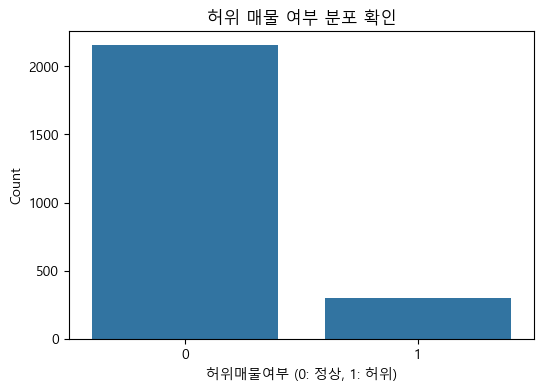

클래스 비율 (%)
허위매물여부
0    87.846656
1    12.153344
Name: proportion, dtype: float64


In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# 타겟 변수 클래스 분포 확인
plt.figure(figsize=(6, 4))
sns.countplot(x='허위매물여부', data=train)
plt.title('허위 매물 여부 분포 확인')
plt.xlabel('허위매물여부 (0: 정상, 1: 허위)')
plt.ylabel('Count')
plt.show()

# 비율 출력
class_counts = train['허위매물여부'].value_counts(normalize=True) * 100
print("클래스 비율 (%)")
print(class_counts)

# 클래스 간 비율 차이가 1.5배 이상 나니까 불균형이라 판단됨

Resmapling 또는 SMOTE 진행

In [83]:
# 그냥 오버 샘플링을 해보기로 합니다
from imblearn.over_sampling import RandomOverSampler

X = train.drop(['허위매물여부', 'ID'], axis=1)
y = train['허위매물여부']

# 범주형 변수 원핫 인코딩
X_encoded = pd.get_dummies(X)

# 오버샘플링 적용
ros = RandomOverSampler(random_state=42)
X_over, y_over = ros.fit_resample(X_encoded, y)

print("오버샘플링 후 클래스 분포 :")
print(y_over.value_counts())

오버샘플링 후 클래스 분포 :
허위매물여부
0    2154
1    2154
Name: count, dtype: int64


# 과제 6 베이스라인의 모델을 바꿔보기
직접 시도한 전처리를 사용하여 모델을 돌려보고 성능을 비교해보세요!

6-1 로지스틱 회귀 모델

In [84]:
# 필수 라이브러리 설치
!pip install imbalanced-learn

# 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import RandomOverSampler

# 데이터 로드
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

# ✅ 1. 결측치 최빈값 대체 (수치형 + 범주형 전부)
train_filled = train.copy()

for col in train_filled.columns:
    mode_val = train_filled[col].mode()[0]
    train_filled[col].fillna(mode_val, inplace=True)

# ✅ 2. X, y 분리
X = train_filled.drop(['허위매물여부', 'ID'], axis=1)
y = train_filled['허위매물여부']

# ✅ 3. 범주형 변수 인코딩 (원핫 인코딩)
X_encoded = pd.get_dummies(X)

# ✅ 4. 오버샘플링 적용
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_encoded, y)

# ✅ 5. MinMaxScaler 적용
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_resampled)

# ✅ 6. 로지스틱 회귀 모델 학습
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_scaled, y_resampled)

# ✅ 7. 테스트 데이터 전처리 동일하게 수행
test_filled = test.copy()

for col in test_filled.columns:
    mode_val = test_filled[col].mode()[0]
    test_filled[col].fillna(mode_val, inplace=True)

# 테스트 데이터 인코딩 (train과 컬럼 맞추기)
test_encoded = pd.get_dummies(test_filled.drop(['ID'], axis=1))

# train과 test 컬럼 차이가 있을 경우 맞춰줌
missing_cols = set(X_encoded.columns) - set(test_encoded.columns)
for col in missing_cols:
    test_encoded[col] = 0

# 컬럼 순서 맞추기
test_encoded = test_encoded[X_encoded.columns]

# MinMaxScaler 적용 (train에서 학습한 scaler 사용)
test_scaled = scaler.transform(test_encoded)

# ✅ 8. 예측
test_pred = lr_model.predict(test_scaled)

# ✅ 9. 결과 저장
sample_submission['허위매물여부'] = test_pred
sample_submission.to_csv("sample_submission_lr.csv", index=False)

print("sample_submission_lr.csv")

sample_submission_lr.csv


C:\Users\ljm16\AppData\Local\Temp\ipykernel_6112\2446910292.py:56: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_encoded[col] = 0
C:\Users\ljm16\AppData\Local\Temp\ipykernel_6112\2446910292.py:56: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_encoded[col] = 0
C:\Users\ljm16\AppData\Local\Temp\ipykernel_6112\2446910292.py:56: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conc

6-2 랜덤 포레스트 모델

In [85]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler

# 데이터 로드
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

# ✅ 1. 결측치 최빈값 대체 (수치형 + 범주형 전부)
train_filled = train.copy()

for col in train_filled.columns:
    mode_val = train_filled[col].mode()[0]
    train_filled[col].fillna(mode_val, inplace=True)

# ✅ 2. X, y 분리
X = train_filled.drop(['허위매물여부', 'ID'], axis=1)
y = train_filled['허위매물여부']

# ✅ 3. 범주형 변수 인코딩 (원핫 인코딩)
X_encoded = pd.get_dummies(X)

# ✅ 4. 오버샘플링 적용
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_encoded, y)

# ✅ 5. MinMaxScaler 적용
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_resampled)

# ✅ 6. 랜덤 포레스트 모델 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_scaled, y_resampled)

# ✅ 7. 테스트 데이터 전처리 동일하게 수행
test_filled = test.copy()

for col in test_filled.columns:
    mode_val = test_filled[col].mode()[0]
    test_filled[col].fillna(mode_val, inplace=True)

# 테스트 데이터 인코딩 (train과 컬럼 맞추기)
test_encoded = pd.get_dummies(test_filled.drop(['ID'], axis=1))

# train과 test 컬럼 차이가 있을 경우 맞춰줌
missing_cols = set(X_encoded.columns) - set(test_encoded.columns)
for col in missing_cols:
    test_encoded[col] = 0

# 컬럼 순서 맞추기
test_encoded = test_encoded[X_encoded.columns]

# MinMaxScaler 적용 (train에서 학습한 scaler 사용)
test_scaled = scaler.transform(test_encoded)

# ✅ 8. 예측
test_pred = rf_model.predict(test_scaled)

# ✅ 9. 결과 저장
sample_submission['허위매물여부'] = test_pred
sample_submission.to_csv("sample_submission_rf.csv", index=False)

print("sample_submission_rf.csv")

sample_submission_rf.csv


C:\Users\ljm16\AppData\Local\Temp\ipykernel_6112\3820630642.py:52: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_encoded[col] = 0
C:\Users\ljm16\AppData\Local\Temp\ipykernel_6112\3820630642.py:52: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_encoded[col] = 0
C:\Users\ljm16\AppData\Local\Temp\ipykernel_6112\3820630642.py:52: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conc

# 과제 7 하이퍼 파라미터 튜닝
교안에서 나온 하이퍼 파라미터 튜닝 방법 3가지의 장담점을 확인해보고 자유롭게 사용하고 싶은 방법을 사용해보세요 !

Grid Search

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# 파라미터 후보 (작게 예시)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# 모델 선언
rf = RandomForestClassifier(random_state=42)

# GridSearchCV 실행
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_scaled, y_resampled)

print(f'Best Params (Grid Search): {grid_search.best_params_}')
print(f'Best Score (Grid Search): {grid_search.best_score_:.4f}')

Best Params (Grid Search): {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Score (Grid Search): 0.9868


Random Search

In [87]:
from sklearn.model_selection import RandomizedSearchCV

# 파라미터 범위 설정 (넓게)
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(50, 500, 10)],
    'max_depth': [None] + list(np.arange(5, 50, 5)),
    'min_samples_split': [2, 5, 10, 20]
}

# RandomizedSearchCV 실행
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=20, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)
random_search.fit(X_scaled, y_resampled)

print(f'Best Params (Random Search): {random_search.best_params_}')
print(f'Best Score (Random Search): {random_search.best_score_:.4f}')

Best Params (Random Search): {'n_estimators': 500, 'min_samples_split': 2, 'max_depth': None}
Best Score (Random Search): 0.9856


Baysian Search

In [88]:
!pip install optuna

import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )
    
    score = cross_val_score(rf, X_scaled, y_resampled, cv=3, scoring='accuracy').mean()
    
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

print('Best Params (Bayesian Search):', study.best_params)
print('Best Score (Bayesian Search):', study.best_value)

[I 2025-03-18 13:59:27,705] A new study created in memory with name: no-name-10825f36-bf1c-4249-b9bc-8d069422b6d0
[I 2025-03-18 13:59:30,045] Trial 0 finished with value: 0.9714484679665739 and parameters: {'n_estimators': 134, 'max_depth': 31, 'min_samples_split': 6}. Best is trial 0 with value: 0.9714484679665739.
[I 2025-03-18 13:59:31,887] Trial 1 finished with value: 0.9575208913649025 and parameters: {'n_estimators': 111, 'max_depth': 36, 'min_samples_split': 19}. Best is trial 0 with value: 0.9714484679665739.
[I 2025-03-18 13:59:36,743] Trial 2 finished with value: 0.9672701949860724 and parameters: {'n_estimators': 292, 'max_depth': 40, 'min_samples_split': 14}. Best is trial 0 with value: 0.9714484679665739.
[I 2025-03-18 13:59:38,801] Trial 3 finished with value: 0.9709842154131848 and parameters: {'n_estimators': 112, 'max_depth': 40, 'min_samples_split': 9}. Best is trial 0 with value: 0.9714484679665739.
[I 2025-03-18 13:59:43,922] Trial 4 finished with value: 0.959842154

Best Params (Bayesian Search): {'n_estimators': 254, 'max_depth': 50, 'min_samples_split': 4}
Best Score (Bayesian Search): 0.9825905292479109


# 추가 문제


**추가문제 1 보팅**

또 다른 분류 모델을 찾아보거나 아는 분들은 여러 모델을 사용해서 보팅을 진행해보세요 !

In [90]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler

# 데이터 로드
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

# ✅ 1. 결측치 최빈값 대체
train_filled = train.copy()
for col in train_filled.columns:
    mode_val = train_filled[col].mode()[0]
    train_filled[col].fillna(mode_val, inplace=True)

# ✅ 2. X, y 분리
X = train_filled.drop(['허위매물여부', 'ID'], axis=1)
y = train_filled['허위매물여부']

# ✅ 3. 범주형 변수 인코딩
X_encoded = pd.get_dummies(X)

# ✅ 4. 오버샘플링
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_encoded, y)

# ✅ 5. MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_resampled)

# ✅ 6. 보팅 분류기 생성
lr_model = LogisticRegression(max_iter=1000, random_state=42)
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)

# 보팅 분류기 (soft 보팅)
voting_clf = VotingClassifier(
    estimators=[
        ('lr', lr_model),
        ('rf', rf_model),
        ('knn', knn_model)
    ],
    voting='soft',  # soft: 확률 평균
    n_jobs=-1
)

# 모델 학습
voting_clf.fit(X_scaled, y_resampled)

# ✅ 7. 테스트 데이터 전처리
test_filled = test.copy()
for col in test_filled.columns:
    mode_val = test_filled[col].mode()[0]
    test_filled[col].fillna(mode_val, inplace=True)

# 테스트 데이터 인코딩
test_encoded = pd.get_dummies(test_filled.drop(['ID'], axis=1))

# 컬럼 맞추기
missing_cols = set(X_encoded.columns) - set(test_encoded.columns)
for col in missing_cols:
    test_encoded[col] = 0

# 컬럼 순서 일치
test_encoded = test_encoded[X_encoded.columns]

# 스케일링
test_scaled = scaler.transform(test_encoded)

# ✅ 8. 예측
test_pred = voting_clf.predict(test_scaled)

# ✅ 9. 결과 저장
sample_submission['허위매물여부'] = test_pred
sample_submission.to_csv("sample_submission_voting.csv", index=False)

print("sample_submission_voting.csv")

C:\Users\ljm16\AppData\Local\Temp\ipykernel_6112\786282984.py:66: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_encoded[col] = 0
C:\Users\ljm16\AppData\Local\Temp\ipykernel_6112\786282984.py:66: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_encoded[col] = 0
C:\Users\ljm16\AppData\Local\Temp\ipykernel_6112\786282984.py:66: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(

sample_submission_voting.csv


**추가문제 2** 배깅

랜덤 포레스트를 배깅으로 구현해보세요!

In [93]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler

# 데이터 로드
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

# ✅ 1. 결측치 최빈값 대체
train_filled = train.copy()
for col in train_filled.columns:
    mode_val = train_filled[col].mode()[0]
    train_filled[col].fillna(mode_val, inplace=True)

# ✅ 2. X, y 분리
X = train_filled.drop(['허위매물여부', 'ID'], axis=1)
y = train_filled['허위매물여부']

# ✅ 3. 범주형 변수 인코딩
X_encoded = pd.get_dummies(X)

# ✅ 4. 오버샘플링
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_encoded, y)

# ✅ 5. MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_resampled)

# ✅ 6. 배깅 기반 RandomForest 구현
# 핵심: max_features를 제한해서 피처 무작위 선택
base_tree = DecisionTreeClassifier(
    max_features='sqrt',  # 특성을 랜덤하게 선택 (RandomForest 기본)
    random_state=42
)

bagging_rf = BaggingClassifier(
    estimator=base_tree,
    n_estimators=100,        # 트리 개수
    max_samples=1.0,         # 부트스트랩 샘플 비율
    bootstrap=True,          # 부트스트랩 사용
    n_jobs=-1,
    random_state=42
)

# 학습
bagging_rf.fit(X_scaled, y_resampled)

# ✅ 7. 테스트 데이터 전처리
test_filled = test.copy()
for col in test_filled.columns:
    mode_val = test_filled[col].mode()[0]
    test_filled[col].fillna(mode_val, inplace=True)

# 테스트 데이터 인코딩
test_encoded = pd.get_dummies(test_filled.drop(['ID'], axis=1))

# 컬럼 맞추기
missing_cols = set(X_encoded.columns) - set(test_encoded.columns)
for col in missing_cols:
    test_encoded[col] = 0

# 컬럼 순서 일치
test_encoded = test_encoded[X_encoded.columns]

# 스케일링
test_scaled = scaler.transform(test_encoded)

# ✅ 8. 예측
test_pred = bagging_rf.predict(test_scaled)

# ✅ 9. 결과 저장
sample_submission['허위매물여부'] = test_pred
sample_submission.to_csv("sample_submission_bagging_as_rf.csv", index=False)

print("sample_submission_bagging_as_rf.csv")


C:\Users\ljm16\AppData\Local\Temp\ipykernel_6112\3259322535.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_encoded[col] = 0
C:\Users\ljm16\AppData\Local\Temp\ipykernel_6112\3259322535.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_encoded[col] = 0
C:\Users\ljm16\AppData\Local\Temp\ipykernel_6112\3259322535.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conc

sample_submission_bagging_as_rf.csv


추가문제를 진행하신 분들은 성능 비교를 꼭 해보세요 !